# Connections between user interface and backend

This notebook shows how both customer-machine and machine-server interactions can be expressed in python code.  

Calling the ``user_signup`` function walks through the entire procedure from registering as a new user to the visualization of the nutritional composition of selected amounts of MuesliMaker ingredients. 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
rc={"font.size":20,"axes.titlesize":8,"axes.labelsize":15, 'xtick.labelsize': 14}
#sns.set(rc=rc)
sns.set_context(rc=rc)
sns.set(style="whitegrid")
# sns.set_palette("husl")
import numpy as np
import pandas as pd

## Knowledge representation

Comments:  
The dictionary of nutritional values (nv) for the 20 selected ingredients is arranged in the following manner:

{ingredient : [list of nutritional values per 100g], ...}
  
  
The list itself is encoded as follows:

- 0: kcal
- 1: fat
- 2: saturated fat
- 3: carbs
- 4: fiber
- 5: sugar
- 6: protein

(Values according to https://www.nutritionvalue.org/ )

In [2]:
# nutritional values
nv = {'Oats':[389, 6.9, 1.2, 66, 11, 0, 17], 
      'Cornflakes':[367, 0.4, 0.1, 84, 1.2, 9.3, 7.5], 
      'Crunchy':[482, 22, 11.1, 60, 5.8, 19.1, 8], 
      'Peanuts': [567, 49, 6.3, 16, 8.5, 4.7, 26], 
      'Almonds': [579, 50, 3.8, 22, 13, 4.4, 21], 
      'Walnuts': [654, 65, 6.1, 14, 6.7, 2.6, 15], 
      'Macadamia':[718, 76, 12, 14, 8.6, 4.6, 7.9], 
      'Pecan nuts':[691, 72, 6.2, 14, 9.6, 4, 9.2], 
      'Cashews':[553, 44, 7.8, 30, 3.3, 5.9, 18], 
      'Chia seeds':[486, 31, 3.3, 42, 34, 0, 17], 
      'Sunflower seeds':[582, 50, 5.2, 24, 11, 2.7, 19], 
      'Pumpkin seeds':[559, 49, 8.7, 11, 6, 1.4, 30], 
      'Raisins':[299, 0.5, 0.1, 79, 3.7, 59, 3.1], 
      'Coconut flakes':[671, 67, 57.5, 24, 16.8, 7.7, 7.2],
      'Cocoa beans':[600, 45.9, 28.2, 31.7, 31.7, 0, 14.1],
      'Protein powder':[359, 1.2, 0.6, 29, 0, 1.2, 58],
      'Cacao':[380, 3, 1, 80, 6, 77, 5], 
      'Cinnamon':[0, 0, 0, 0, 0, 0, 0], 
      'Vanilla':[0, 0, 0, 0, 0, 0, 0], 
      'Dry fruit':[247, 0, 0, 63.5, 7.1, 28.2, 3.5]}


# categories - ingredients and max. amount [g] for portion size [Large, Medium, Small]
categories = {'cereals':[['Oats', 'Cornflakes', 'Crunchy'],[100, 80, 60]],
              'nuts':[['Peanuts', 'Almonds', 'Walnuts', 'Macadamia', 'Pecan nuts', 'Cashews'],[40, 25, 10]],
              'seeds':[['Chia seeds', 'Sunflower seeds', 'Pumpkin seeds'],[40, 25, 10]],
              'toppings':[['Raisins' ,'Coconut flakes', 'Cocoa beans', 'Dry fruit'],[40, 25, 10]],
              'powders':[['Protein powder', 'Cacao'],[40, 25, 10]],
              'spices':[['Cinnamon', 'Vanilla'],[3, 2, 1]]}


# create full list of user attributes including preferences
user_attributes = ['Gender','Age', 'Weight (kg)','Disease', 'Exercise (#days/week)']
for i in range(len(list(nv.keys()))):
    user_attributes.append(list(nv.keys())[i])

# initialize stock in [kg]
current_stock = {'Oats':10.0, 
      'Cornflakes':10.0, 
      'Crunchy':10.0, 
      'Peanuts': 3.0, 
      'Almonds': 3.0, 
      'Walnuts': 2.0, 
      'Macadamia':2.0, 
      'Pecan nuts':2.0, 
      'Cashews':3.0, 
      'Chia seeds':2.0, 
      'Sunflower seeds':2.0, 
      'Pumpkin seeds':2.0, 
      'Raisins':4.0, 
      'Coconut flakes':2.0,
      'Cocoa beans':2.0,
      'Protein powder':2.0,
      'Cacao':2.0, 
      'Cinnamon':0.2, 
      'Vanilla':0.2, 
      'Dry fruit':3.0}

stock = pd.DataFrame.from_dict(current_stock, orient='index')
stock.to_csv('currentStock.csv')


# the ingredients list contains the amount of ingredients in gram, acoording to customer selection
ingredients = [70, 0, 0, 10, 10, 5, 0, 20, 0, 5, 5, 0, 0, 0, 10, 0, 0, 1, 1, 10]


# import the user dataframe (udf) globally
udf = pd.read_csv('cleanDatabase.csv')
current_ids = {'ids':list(np.arange(len(udf.index)))}

udf.head()

,Gender,Age,Weight (kg),Disease,Exercise (#days/week),Oats,Cornflakes,Crunchy,Peanuts,Almonds,...,Sunflower seeds,Pumpkin seeds,Raisins,Coconut flakes,Cocoa beans,Protein powder,Cacao,Cinnamon,Vanilla,Dry fruit
0,1,30,64,None,2,9,5,5,7,6,...,3,5,3,8,2,9,1,4,8,8
1,1,44,58,Gluten,4,1,6,10,5,8,...,2,1,8,3,5,5,10,2,4,10
2,1,40,73,None,3,1,2,1,6,8,...,9,8,4,8,3,5,9,10,6,4
3,1,63,48,Diabetes,7,3,10,8,8,7,...,4,3,10,9,10,5,7,8,9,2
4,0,59,82,Peanuts,4,4,1,1,1,3,...,9,6,8,6,2,9,1,7,8,2


# Function definitions

__For some reason the cell below must be executed TWICE on the first run.__

In [8]:
'''
Dictionary conversions
'''
def todict(order_list):
    # takes a list of 20 ingredients and converts them to a dictionary
    if len(order_list) != len(nv):
        print('Cannot convert given list to dictionary.\n'+
             'Expected list of length', len(nv.keys), 'but got a list of length', len(order_list), 'instead.')
    else:
        order_dict = dict(zip(nv.keys(), order_list))
    return(order_dict)

def todict_user(user_list):
    # user list must be of the same type as rows in the Breakfast sheet
    user_dict = dict(zip(user_attributes, user_list))
    return(user_dict)



'''
SIGN UP/LOG IN
'''
def user_signup():
    breakfast_db = pd.read_csv('cleanDatabase.csv')
    current_ids = {'ids':list(np.arange(len(breakfast_db.index)))}
    cancel_signup = False
    print('You\'ll be registered in no time. \nJust quickly help us to get to know you a bit better.'\
                  '\nHow old are you?')
    while cancel_signup == False:
        try:
            age = int(input('Please enter your age in years.'))
        except ValueError:
            print("Please enter your age in years.")
            continue
    
        if age < 5 or age > 120:
            print("The number you entered seems implausible. Please enter your age in years.")
            continue
        elif age == 'c':
            cancel_signup = True
        else:
            break
    while True:
        try:
            gender = int(input('What\'s your gender? Please enter 0 for Male and 1 for Female.'))
        except ValueError:
            print("Please enter 0 for Male and 1 for Female.")
            continue
    
        if gender < 0 or gender > 1:
            print("Please enter 0 for Male and 1 for Female.")
            continue
        elif gender == 'c':
            cancel_signup = True
        else:
            break
    print('We know the next question might be a bit personal but we promise to keep it a secret ;)')
    while True:
        try:
            weight = int(input('Please enter your weight in [kg].'))
        except ValueError:
            print("Please enter a postitive number.")
            continue
    
        if weight > 300 or weight < 15:
            print("The number you entered seems implausible. Please enter your weight in [kg].")
            continue
        else:
            break
    while True:
        try:
            exercise = int(input('Please enter the number of days that you exercise per week [0-7]'))
        except ValueError:
            print("Please enter a number between 0 and 7.")
            continue
    
        if exercise not in np.arange(8):
            print("Please enter a number between 0 and 7.")
            continue
        else:
            break
    print('Next, we need to know if we need to take care of special requirements when suggesting meals to you.')        
    while True:
        try:
            allergies = int(input('Please enter the number from the following list that best describes your allergies/sensitivities:\n\n0 - None\n1 - Peanuts\n2 - Almonds\n3 - Walnuts'))
        except ValueError:
            print("Please enter a number between 0 and 3.")
            continue
    
        if allergies not in np.arange(4):
            print("Please enter a number between 0 and 3.")
            continue
        else:
            allergies_dict = {0:'None', 1:'Peanuts', 2:'Almonds', 3:'Walnuts'}
            disease = allergies_dict[allergies]
            break
    preference = list(np.zeros(20))
    print('\nPlease rate the following ingredients from 0 ("I would never eat this") to 10 ("Absolutely essential")')
    for i in range(20):
        while True:
            try:
                rating = int(input(list(nv.keys())[i]))
                preference[i] = rating
            except ValueError:
                print("Please rate between 0 and 10.")
                continue

            if rating < 0 or rating > 10:
                print("Please rate between 0 and 10.")
                continue
            else:
                break

    new_userid = len(current_ids['ids'])
    current_ids['ids'].append(new_userid)
    # rerun the clustering algorithm every 10 new users
    if len(current_ids['ids'])%10 == 0:
        performClustering('cleanDatabase.csv')
        print('Clustering new users.')
        
    # add new user to database
    user_preferences = [gender, age, weight, disease, exercise]
    for i in range(len(list(nv.keys()))):
        user_preferences.append(preference[i])
    usr_df = pd.DataFrame.from_dict(todict_user(user_preferences), orient='index').T
    # update breakfast database and current ID's
    # breakfast_db = pd.concat([breakfast_db, usr_df], ignore_index=True)
    breakfast_db = breakfast_db.append(usr_df, ignore_index=True)
    breakfast_db.to_csv('cleanDatabase.csv', index=False)
    
    print('\nThank you! You\'re all set now. Your new user ID is:' , new_userid)
    
    breakfast_db = pd.read_csv('cleanDatabase.csv')
    order = int(input('\nProceed to a standard order? \nEnter 1 for yes or 0 for no.'))
    if order == 0:
        print('No problem, see you later.')
    elif order == 1:
        standard_portion(user_preferences, new_userid)
    
    return breakfast_db



'''
USER ID
'''
def get_user_ID():
    breakfast_db = pd.read_csv('cleanDatabase.csv')
    # dict holding a list of all user ID's
    current_ids = {'ids':list(np.arange(len(breakfast_db.index)))}
    cancel = False
    
    while True:
        try:
            check_userid = int(input('Please enter your user ID if you already have one or press any key to sign up.'))
        except ValueError:
            user_signup()
            break
    
        if check_userid in current_ids['ids']:
            print('Great to see you again :) Let\'s get started.')
            user_preferences = breakfast_db.iloc[check_userid]
        
            try:
                order = int(input('\nProceed to a standard order? \nEnter 1 for yes or 0 for no.'))
            except ValueError:
                print("Please enter 0 or 1.")
                continue

            if order == 0:
                print('No problem, see you later.')
            elif order == 1:
                standard_portion(user_preferences, check_userid)
            elif order == 'c':
                cancel = True
            else:
                continue
            break      
        else:
            print('That\'s strange, we don\'t have that user ID in our database yet.')
            user_signup()
        break

            
'''
FILL STOCK
'''
def fill():
    current_stock.update({'Oats':10.0, 
      'Cornflakes':10.0, 
      'Crunchy':10.0, 
      'Peanuts': 3.0, 
      'Almonds': 3.0, 
      'Walnuts': 2.0, 
      'Macadamia':2.0, 
      'Pecan nuts':2.0, 
      'Cashews':3.0, 
      'Chia seeds':2.0, 
      'Sunflower seeds':2.0, 
      'Pumpkin seeds':2.0, 
      'Raisins':4.0, 
      'Coconut flakes':2.0,
      'Cocoa beans':2.0,
      'Protein powder':2.0,
      'Cacao':2.0, 
      'Cinnamon':0.2, 
      'Vanilla':0.2, 
      'Dry fruit':3.0})
    print('Machine refilled. Current stock:')
    return current_stock



'''
GET ALTERNATIVE INGREDIENT
according to ingredient similarity and which of the similar 
ingredients are most abundant in stock.
'''
def get_alternative(ingredient, ingredients):
    # order and current stock in [kg]:
    ing = np.asarray(ingredients)/1000
    cs = np.asarray(list(current_stock.values()))
    
    for cat in categories:
        if ingredient in categories[cat][0]:
            df = pd.DataFrame.from_dict(current_stock, orient='index')
            # suggest a different ingredient with most supplies in stock as alternative:
            # but only if the available alternatives have sufficient stock
            pos_oos = [i for i, x in enumerate(ing>cs) if x]
            alternative = df.loc[categories[cat][0]].idxmax()[0]
            alt_pos = df.index.get_loc(alternative)
            # print('Found alternative for:',ingredient,':\n', alternative)
            ingredients[alt_pos] = ingredients[pos_oos[0]]
            ingredients[pos_oos[0]] = 0
            
    return alternative, ingredients



'''
ORDER & VISUALIZATION
Takes a list of ingredients in [g] as input and subtracts it from the current stock.
It will output a warning if certain ingredients are running low and throw an error if 
the (amount of) ordered ingredient is currently not in stock.

It will call get_alternative if some ingredient is unavailable in the desired amount.
'''
def order(ingredients):
# order and current stock in [kg]:
    ing = np.asarray(ingredients)/1000
    cs = np.asarray(list(current_stock.values()))
    oos = ing > cs # out of stock items
    
# check for order feasibility:
    
    # 1. portion too big
    if ing.sum() > 270:
        print('Yay, that\'s a big portion! ...Unfortunately it probably won\'t fit into your bowl.',
              '\nIf you\'re really that hungry: no problem! Feel free to order twice :)')
        
    # 2. at least one ingredient out of stock
    elif oos.sum() > 0:
        pos_oos = [i for i, x in enumerate(oos) if x]
        out_of_stock = []
        for j in pos_oos:
            out_of_stock.append(list(current_stock.keys())[j])
        print('We\'re sorry, at least one of your ordered ingredients is currently out of stock :(',
             '\nBut hey, that\'s the perfect opportunity to try something new!')
        for x in range(len(out_of_stock)):
            
            for cat in categories:
                if ingredient in categories[cat]:
                    df = pd.DataFrame.from_dict(current_stock, orient='index')
                    # suggest the ingredient with most supplies in stock as alternative:
                    alternative = df.loc[categories[cat]].idxmax()[0]    
            alternative = get_alternative(out_of_stock[x], ingredients)
            print('\nHow about', alternative[0], 'instead of', out_of_stock[x], 'today?') 
            a = input('\nPress "y" if that sounds great to you! \nCancel the order by pressing any other key.\n')
            
    # 2.1 User accepts alternative suggestion -> Order can proceed normally        
            if a == 'y':
                # update ingredients
                
                print('Perfect, your order has been updated.')
                
                ingredients_kg = {k: v / 1000 for k, v in todict(ingredients).items()}
                #subtract order from storage
                current_stock.update({key: current_stock[key] - ingredients_kg.get(key, 0) for key in current_stock.keys()})

                # check for low supplies:
                critical = np.fromiter(current_stock.values(), dtype=float) < 0.2
                pos_low_supplies = [i for i, x in enumerate(critical) if x]
                low_supplies = []
                for j in pos_low_supplies:
                    low_supplies.append(list(current_stock.keys())[j])
                if critical.sum() > 0:
                    print('\nWARNING:')
                    for x in range(len(low_supplies)):
                        print('Less than 200g of', low_supplies[x], 'in stock!')

                print('\nOrder has been placed. Stock was updated:')
                return current_stock
                
    # 2.2 order is cancelled            
            else:
                print('We\'re sorry to hear that :(\nNew supplies are on the way.')
                # get other suggestions? Or cancel order... :(
        
    # Order can proceed normally:
    else:
        # convert to dictionary and [kg]
        ingredients_kg = {k: v / 1000 for k, v in todict(ingredients).items()}
        #subtract order from storage
        current_stock.update({key: current_stock[key] - ingredients_kg.get(key, 0) for key in current_stock.keys()})

        # check for low supplies:
        critical = np.fromiter(current_stock.values(), dtype=float) < 0.2
        pos_low_supplies = [i for i, x in enumerate(critical) if x]
        low_supplies = []
        for j in pos_low_supplies:
            low_supplies.append(list(current_stock.keys())[j])
        if critical.sum() > 0:
            print('\nWARNING:')
            for x in range(len(low_supplies)):
                print('Less than 200g of', low_supplies[x], 'in stock!')
        
        grams = todict(ingredients)
        meal_comp = []
        for ingredient in nv.keys():
            meal_comp.append(np.array(nv[ingredient])*grams[ingredient]/100)

        meal = np.asarray(meal_comp).sum(axis=0)

        # a dictionary of only selected ingredients:
        selected = dict((k, v) for k, v in grams.items() if v > 0)

        # plot results
        data = meal[1:]
        index = ['Fat', 'Saturated\nFat', 'Carbs', 'Fiber', 'Sugar', 'Protein']
        pal = sns.color_palette("Reds_d", len(index))
        # rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638

        fig, ax = plt.subplots(figsize=(7,4))
        sns.barplot(index, y=data, palette=np.array(pal[::-1]))
        plt.ylabel('Weight [g]', fontsize=14);
        plt.title(('Total energy in this meal: ' + str(round(meal[0])) + ' kcal'), fontsize=16)

        print('\nOrder has been placed. Stock was updated:', current_stock)
        return current_stock

    
'''
PORTION SIZES
This function asks for the desired portion size and calculates a list of ingredients in [gram]
for a 'standard meal' the given customer will like according to his preferences.
'''    
def standard_portion(user_preferences, user_id):
    dataframe = pd.read_csv('cleanDatabase.csv')
    print('Please select your portion size from the three options below:')
    while True:
        try:
            meal_size = int(input('0 - Large\n1 - Medium\n2 - Small\n'))
        except ValueError:
            print('Please enter either 0, 1 or 2 according to Large, Medium or Small')
            continue
        
        if meal_size < 0 or meal_size > 2:
            print('Please enter either 0, 1 or 2 according to Large, Medium or Small')
        else:
            lst = []
            selection = []
            for cat in categories:
                lst.append(list(np.repeat(categories[cat][1][meal_size], len(categories[cat][0]))))
            flat_list = [item for sublist in lst for item in sublist]

            ordered_ingredients = {}
            for cat in categories.keys():
                ingr = []
                for i in categories[cat][0]:
                    if dataframe.loc[user_id][i] > 5:
                    # if a user rates the ingredient 6/10 or more, include it in meal    
                        ingr.append(i)
                        d1 = {cat:[ingr, len(ingr)]}
                        ordered_ingredients.update(d1)
                        selection.append(dataframe.loc[user_id][i])
                    else:
                        selection.append(0)
                        
            for i in range(len(selection)):
                if selection[i] > 0:
                    flat_list[i] = flat_list[i]
                else:
                    flat_list[i] = 0
                    
            standard_meal = dict((k, v) for k, v in todict(flat_list).items() if v > 0)
            print('Suggested standard meal for you:\n', standard_meal)
                        
            for cat in categories.keys():
                if cat not in ordered_ingredients.keys():
                    print(cat, 'not in user preferences')
                    missing_cat_dict = {cat:[[],0]}
                    ordered_ingredients.update(missing_cat_dict)
                    
            divide_by = []
            for cat in categories.keys():
                for i in range(len(categories[cat][0])):
                     divide_by.append(ordered_ingredients[cat][1])

            for n in range(len(np.asarray(divide_by))):
                if divide_by[n] > 0:
                    flat_list[n] = flat_list[n]/divide_by[n]
                else:
                    flat_list[n] = 0
            ingredi = list(np.asarray(flat_list))
            order(ingredi)
            break
            
            
'''
IMPORT RECOMMENDATION FUNCTIONS
'''            
%run Recommendation_functions_from_Alessandro.py

Database Extraction
Extracting DF into Apriori format
Database Extraction
Generate Clusters and predict User group!
You belong to group:  1
{'Cacao', 'Crunchy', 'Pumpkin seeds', 'Vanilla', 'Peanuts', 'Sunflower seeds', 'Oats', 'Chia seeds', 'Raisins', 'Cornflakes'}
{'Vanilla', 'Macadamia', 'Sunflower seeds', 'Chia seeds', 'Raisins', 'Cashews', 'Cornflakes', 'Coconut flakes', 'Walnuts'}
{'Almonds', 'Crunchy', 'Pumpkin seeds', 'Protein powder', 'Peanuts', 'Macadamia', 'Sunflower seeds', 'Cinnamon', 'Chia seeds', 'Cornflakes'}


Please enter your user ID if you already have one or press any key to sign up.3
Great to see you again :) Let's get started.

Proceed to a standard order? 
Enter 1 for yes or 0 for no.1
Please select your portion size from the three options below:
0 - Large
1 - Medium
2 - Small
1
Suggested standard meal for you:
 {'Cornflakes': 80, 'Crunchy': 80, 'Peanuts': 25, 'Almonds': 25, 'Macadamia': 25, 'Chia seeds': 25, 'Raisins': 25, 'Coconut flakes': 25, 'Cocoa beans': 25, 'Cinnamon': 25, 'Vanilla': 2, 'Dry fruit': 2}

Less than 200g of Cinnamon in stock!
Less than 200g of Vanilla in stock!

Order has been placed. Stock was updated: {'Oats': 9.98, 'Cornflakes': 9.89, 'Crunchy': 9.89, 'Peanuts': 2.9783333333333335, 'Almonds': 2.9783333333333335, 'Walnuts': 2.0, 'Macadamia': 1.9733333333333334, 'Pecan nuts': 1.995, 'Cashews': 3.0, 'Chia seeds': 1.935, 'Sunflower seeds': 1.995, 'Pumpkin seeds': 1.995, 'Raisins': 3.975, 'Coconut flakes': 1.9749999999999999, 'Cocoa beans': 1.9783333333333333, 'Prot

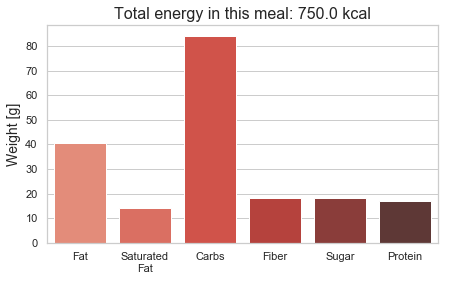

In [9]:
'''
EXAMPLE WITH USER ALREADY REGISTERED
'''
get_user_ID()

Please enter your user ID if you already have one or press any key to sign up.98
That's strange, we don't have that user ID in our database yet.
You'll be registered in no time. 
Just quickly help us to get to know you a bit better.
How old are you?
Please enter your age in years.23
What's your gender? Please enter 0 for Male and 1 for Female.0
We know the next question might be a bit personal but we promise to keep it a secret ;)
Please enter your weight in [kg].65
Please enter the number of days that you exercise per week [0-7]2
Next, we need to know if we need to take care of special requirements when suggesting meals to you.
Please enter the number from the following list that best describes your allergies/sensitivities:

0 - None
1 - Peanuts
2 - Almonds
3 - Walnuts0

Please rate the following ingredients from 0 ("I would never eat this") to 10 ("Absolutely essential")
Oats10
Cornflakes6
Crunchy7
Peanuts2
Almonds
Please rate between 0 and 10.
Almonds4
Walnuts5
Macadamia6
Pecan nuts

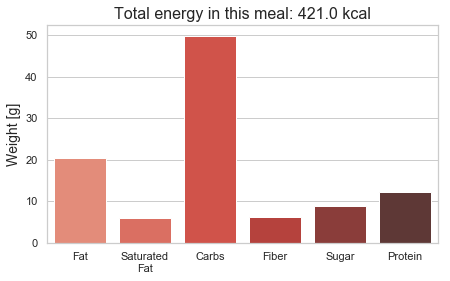

In [7]:
'''
EXAMPLE WITH NEW USER SIGNUP
'''
get_user_ID()

In [10]:
fill()

Machine refilled. Current stock:


{'Oats': 10.0,
 'Cornflakes': 10.0,
 'Crunchy': 10.0,
 'Peanuts': 3.0,
 'Almonds': 3.0,
 'Walnuts': 2.0,
 'Macadamia': 2.0,
 'Pecan nuts': 2.0,
 'Cashews': 3.0,
 'Chia seeds': 2.0,
 'Sunflower seeds': 2.0,
 'Pumpkin seeds': 2.0,
 'Raisins': 4.0,
 'Coconut flakes': 2.0,
 'Cocoa beans': 2.0,
 'Protein powder': 2.0,
 'Cacao': 2.0,
 'Cinnamon': 0.2,
 'Vanilla': 0.2,
 'Dry fruit': 3.0}

Database Extraction
Data Preprocessing
Generate Clusters and predict User group!
Data Preprocessing


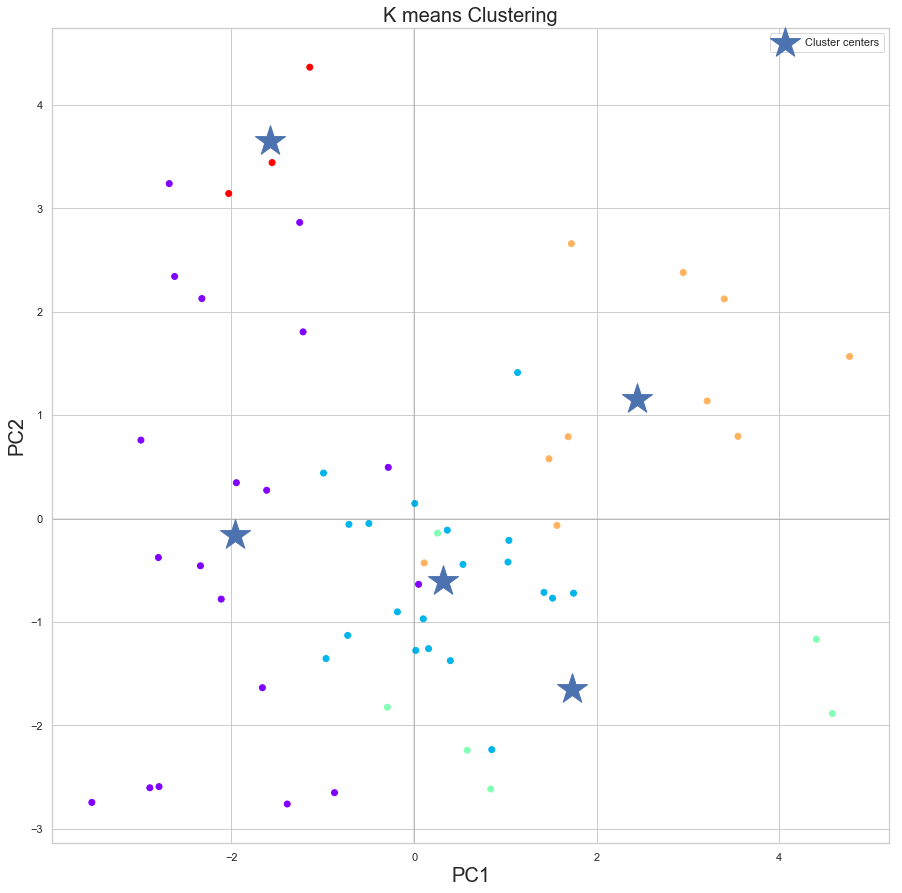

In [11]:
performClustering('cleanDatabase.csv')

In [12]:
user_id = 46
user_preferences = udf.iloc[46]
u = np.array(user_preferences).reshape(1,25)
recommendMeal(u)

Database Extraction
Generate Clusters and predict User group!
You belong to group:  0


({'Almonds',
  'Cacao',
  'Cocoa beans',
  'Cornflakes',
  'Crunchy',
  'Macadamia',
  'Oats',
  'Peanuts',
  'Pecan nuts',
  'Protein powder',
  'Sunflower seeds'},
 {'Almonds',
  'Cacao',
  'Chia seeds',
  'Cornflakes',
  'Crunchy',
  'Oats',
  'Pumpkin seeds',
  'Raisins',
  'Sunflower seeds',
  'Vanilla'},
 {'Cacao',
  'Cashews',
  'Cocoa beans',
  'Coconut flakes',
  'Cornflakes',
  'Crunchy',
  'Macadamia',
  'Oats',
  'Peanuts',
  'Vanilla',
  'Walnuts'})